In [1]:
import hydra
import rootutils
rootutils.setup_root("../", indicator=".project-root", pythonpath=True)
import os
os.chdir("../")


In [2]:
from omegaconf import OmegaConf
config = r"./data/data_cloud/config.yaml"
config = OmegaConf.load(config)
config.data.train_config.data_dir="./data/data_cloud/H8JPEG_valid"
config.data.val_config.data_dir="./data/data_cloud/validate_croped"
config.data.batch_size = 1
config.data.batch_size_val = 1
ckpt = r"./data/data_cloud/step_1605_loss0.082.ckpt"

In [3]:
data_module = hydra.utils.instantiate(config.data)
data_module.setup()
batch_sample = next(iter(data_module.train_dataloader()))

A total of 1110 image, and has 1 regions; 1110 datatimes
only 1110 time series is generated wihch has 1 regions ,and 630 time series is valid , length is 19 , information saved in data/temp.json
split_path is not specified, reading from ./data/data_cloud/H8JPEG_valid, got 630 samples
load samples from /home/pandaru/workspace/cloud_forecasting/data//valid.json, got 64 samples
load samples from /home/pandaru/workspace/cloud_forecasting/data//valid.json, got 64 samples


In [4]:
batch_sample["images"].shape

torch.Size([1, 19, 3, 256, 256])

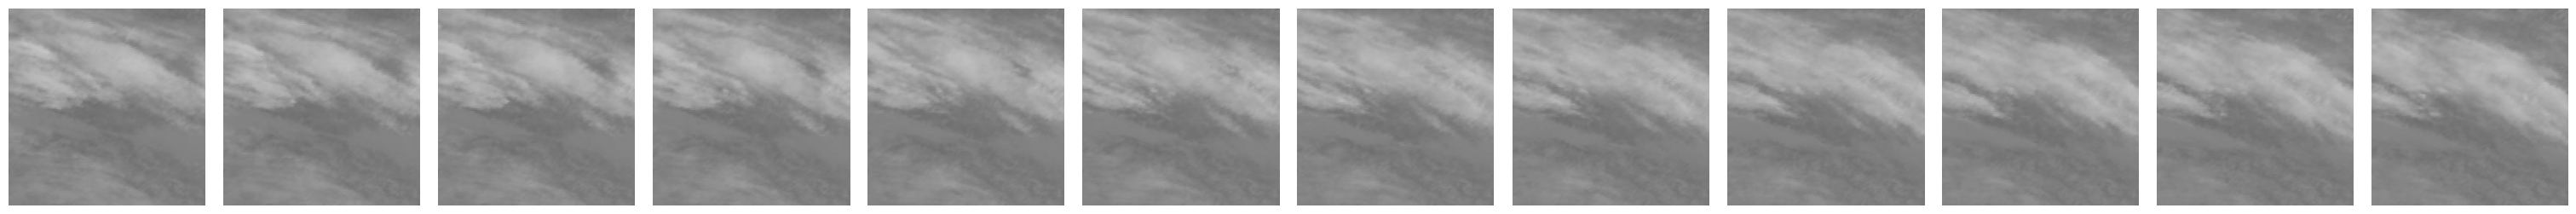

In [5]:
from src.utils import show_video_line,show_video_gif_multiple,show_video_gif_single
show_video_line(batch_sample["images"][0].numpy(), ncols=12, vmax=0.6, cbar=False, out_path=None, format='png', use_rgb=True)

In [6]:
import torch
module = hydra.utils.instantiate(config.model)
module.load_state_dict( torch.load(ckpt,map_location="cpu")["state_dict"])

<All keys matched successfully>

In [7]:
with torch.no_grad():
    img_gen, logs  = module.RNN_test_step(batch_sample, "val")

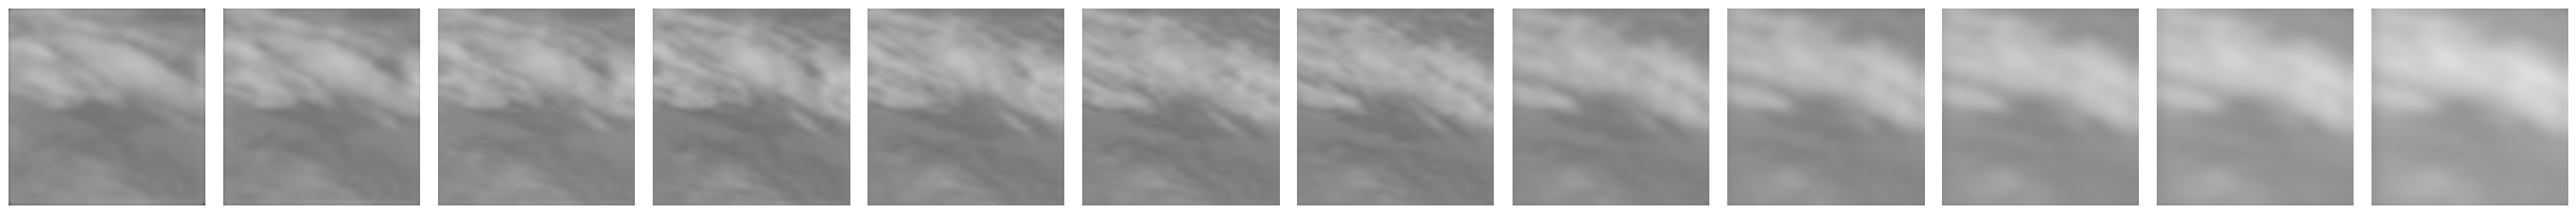

In [21]:
show_video_line(img_gen[0].detach().numpy(), ncols=12, vmax=0.6, cbar=False, out_path=None, format='png', use_rgb=True)


In [ ]:
# show_video_gif_single(
# img_gen.detach().numpy()[0],
# out_path="."
# )


In [ ]:
# from src.utils import show_video_gif_multiple

# example_idx = 0
# show_video_gif_multiple(inputs[example_idx], trues[example_idx], preds[example_idx], use_rgb=True, out_path='example.gif')